## Project: Kharif Crop Yield Prediction Project Using Python (Part-1)

## Problem Statement: In the agricultural sector, accurately forecasting crop yields is crucial for ensuring food security and optimizing resource allocation. This project addresses the challenge of predicting crop yields for Kharif season crops in regions with similar characteristics. Using a dataset containing attributes such as climatic conditions, soil characteristics, air quality, and agricultural inputs (e.g., fertilizers and pesticides), exploratory data analysis (EDA) was conducted to uncover key patterns. A time-series machine learning or deep learning model was then developed to predict crop yields, enabling better planning and decision-making for sustainable agricultural practices.

## 

## Impoerting Essential Libraries:

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

## Reading the Data-File:

In [2]:
df=pd.read_csv("crop_production.csv")
df

,Unnamed: 0,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,...,wspd_avg,pres_avg,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
0,0,Rice,1997,Autumn,Assam,607358.0,398311,2051.4,5.780226e+07,188280.98,...,NaN,NaN,374.501098,0.016470,1.000221,30.433663,0.864985,25.162719,28.445155,4.410782
1,1,Rice,1997,Summer,Assam,174974.0,209623,2051.4,1.665228e+07,54241.94,...,NaN,NaN,374.501098,0.016470,1.000221,30.433663,0.864985,25.162719,28.445155,4.410782
2,2,Rice,1997,Winter,Assam,1743321.0,1647296,2051.4,1.659119e+08,540429.51,...,NaN,NaN,374.501098,0.016470,1.000221,30.433663,0.864985,25.162719,28.445155,4.410782
3,3,Rice,1997,Kharif,Karnataka,1031530.0,2340493,1266.7,9.817071e+07,319774.30,...,12.981818,1011.172727,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
4,4,Rice,1997,Rabi,Karnataka,53889.0,109350,1266.7,5.128616e+06,16705.59,...,12.981818,1011.172727,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1192,Rice,2018,Autumn,Odisha,454370.0,527490,1635.9,7.369881e+07,159029.50,...,NaN,NaN,431.167345,0.170650,5.405914,53.132558,5.117803,61.173185,68.130309,3.772940
1193,1193,Rice,2018,Summer,Odisha,274230.0,925810,1635.9,4.448011e+07,95980.50,...,NaN,NaN,431.167345,0.170650,5.405914,53.132558,5.117803,61.173185,68.130309,3.772940
1194,1194,Rice,2018,Winter,Odisha,3130820.0,6280410,1635.9,5.078190e+08,1095787.00,...,NaN,NaN,431.167345,0.170650,5.405914,53.132558,5.117803,61.173185,68.130309,3.772940
1195,1195,Rice,1998,Kharif,Nagaland,141000.0,205000,1498.0,1.393080e+07,40890.00,...,NaN,NaN,328.611851,0.044295,2.185430,35.886474,0.809673,19.575835,22.555509,2.803836


In [3]:
df.shape

(1197, 27)

## Exploratory Data Analysis starts:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1197 non-null   int64  
 1   Crop             1197 non-null   object 
 2   Crop_Year        1197 non-null   int64  
 3   Season           1197 non-null   object 
 4   State            1197 non-null   object 
 5   Area             1197 non-null   float64
 6   Production       1197 non-null   int64  
 7   Annual_Rainfall  1197 non-null   float64
 8   Fertilizer       1197 non-null   float64
 9   Pesticide        1197 non-null   float64
 10  Yield            1197 non-null   float64
 11  Latitude         1197 non-null   float64
 12  Longitude        1197 non-null   float64
 13  temp_avg         520 non-null    float64
 14  temp_min_avg     520 non-null    float64
 15  temp_max_avg     520 non-null    float64
 16  prcp_avg         520 non-null    float64
 17  wspd_avg      

In [5]:
df.isnull().sum()

Unnamed: 0           0
Crop                 0
Crop_Year            0
Season               0
State                0
Area                 0
Production           0
Annual_Rainfall      0
Fertilizer           0
Pesticide            0
Yield                0
Latitude             0
Longitude            0
temp_avg           677
temp_min_avg       677
temp_max_avg       677
prcp_avg           677
wspd_avg           677
pres_avg           677
CO                   0
NO                   0
NO2                  0
O3                   0
SO2                  0
PM25                 0
PM10                 0
NH3                  0
dtype: int64

In [6]:
df.drop(['temp_avg','temp_min_avg','temp_max_avg','prcp_avg','wspd_avg','pres_avg'],axis=1,inplace=True)

In [7]:
df.head(1197)

,Unnamed: 0,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,...,Latitude,Longitude,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
0,0,Rice,1997,Autumn,Assam,607358.0,398311,2051.4,5.780226e+07,188280.98,...,26.407384,93.255130,374.501098,0.016470,1.000221,30.433663,0.864985,25.162719,28.445155,4.410782
1,1,Rice,1997,Summer,Assam,174974.0,209623,2051.4,1.665228e+07,54241.94,...,26.407384,93.255130,374.501098,0.016470,1.000221,30.433663,0.864985,25.162719,28.445155,4.410782
2,2,Rice,1997,Winter,Assam,1743321.0,1647296,2051.4,1.659119e+08,540429.51,...,26.407384,93.255130,374.501098,0.016470,1.000221,30.433663,0.864985,25.162719,28.445155,4.410782
3,3,Rice,1997,Kharif,Karnataka,1031530.0,2340493,1266.7,9.817071e+07,319774.30,...,14.520390,75.722352,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
4,4,Rice,1997,Rabi,Karnataka,53889.0,109350,1266.7,5.128616e+06,16705.59,...,14.520390,75.722352,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1192,Rice,2018,Autumn,Odisha,454370.0,527490,1635.9,7.369881e+07,159029.50,...,20.543124,84.689732,431.167345,0.170650,5.405914,53.132558,5.117803,61.173185,68.130309,3.772940
1193,1193,Rice,2018,Summer,Odisha,274230.0,925810,1635.9,4.448011e+07,95980.50,...,20.543124,84.689732,431.167345,0.170650,5.405914,53.132558,5.117803,61.173185,68.130309,3.772940
1194,1194,Rice,2018,Winter,Odisha,3130820.0,6280410,1635.9,5.078190e+08,1095787.00,...,20.543124,84.689732,431.167345,0.170650,5.405914,53.132558,5.117803,61.173185,68.130309,3.772940
1195,1195,Rice,1998,Kharif,Nagaland,141000.0,205000,1498.0,1.393080e+07,40890.00,...,26.163056,94.588491,328.611851,0.044295,2.185430,35.886474,0.809673,19.575835,22.555509,2.803836


### Crop Production in Kharif Season:

In [8]:
df1_kharif=df[df['Season'] == 'Kharif     ']

In [9]:
df1_kharif

,Unnamed: 0,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,...,Latitude,Longitude,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
3,3,Rice,1997,Kharif,Karnataka,1031530.0,2340493,1266.700000,9.817071e+07,319774.30,...,14.520390,75.722352,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
6,6,Rice,1997,Kharif,Meghalaya,105170.0,150101,3818.200000,1.000903e+07,32602.70,...,25.537943,91.299910,360.723783,0.101559,3.785320,57.365694,1.508877,31.942162,35.108104,1.491881
10,10,Rice,1998,Kharif,Puducherry,4945.0,11518,1434.587500,4.885660e+05,1434.05,...,10.915649,79.806949,374.877323,0.366987,7.600534,59.931593,5.227645,29.551619,35.972366,3.103348
16,16,Rice,1998,Kharif,Goa,41000.0,104249,2964.900000,4.050800e+06,11890.00,...,15.300454,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
18,18,Rice,1998,Kharif,Karnataka,1079193.0,2599170,1260.800000,1.066243e+08,312965.97,...,14.520390,75.722352,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1165,Rice,2010,Kharif,Goa,30632.0,72221,4193.300000,5.088282e+06,7351.68,...,15.300454,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
1170,1170,Rice,2011,Kharif,Goa,31247.0,78770,3340.395455,5.234497e+06,10311.51,...,15.300454,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
1175,1175,Rice,2012,Kharif,Goa,31255.0,81229,3048.900000,4.713254e+06,9689.05,...,15.300454,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
1195,1195,Rice,1998,Kharif,Nagaland,141000.0,205000,1498.000000,1.393080e+07,40890.00,...,26.163056,94.588491,328.611851,0.044295,2.185430,35.886474,0.809673,19.575835,22.555509,2.803836


In [10]:
df2_kharif = df1_kharif[['State','Annual_Rainfall','Latitude','Longitude','Fertilizer','Pesticide','CO','NO','NO2','O3','SO2','PM25','PM10','NH3']]

In [11]:
df2_kharif

,State,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
3,Karnataka,1266.700000,14.520390,75.722352,9.817071e+07,319774.30,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
6,Meghalaya,3818.200000,25.537943,91.299910,1.000903e+07,32602.70,360.723783,0.101559,3.785320,57.365694,1.508877,31.942162,35.108104,1.491881
10,Puducherry,1434.587500,10.915649,79.806949,4.885660e+05,1434.05,374.877323,0.366987,7.600534,59.931593,5.227645,29.551619,35.972366,3.103348
16,Goa,2964.900000,15.300454,74.085513,4.050800e+06,11890.00,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
18,Karnataka,1260.800000,14.520390,75.722352,1.066243e+08,312965.97,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Goa,4193.300000,15.300454,74.085513,5.088282e+06,7351.68,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
1170,Goa,3340.395455,15.300454,74.085513,5.234497e+06,10311.51,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
1175,Goa,3048.900000,15.300454,74.085513,4.713254e+06,9689.05,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
1195,Nagaland,1498.000000,26.163056,94.588491,1.393080e+07,40890.00,328.611851,0.044295,2.185430,35.886474,0.809673,19.575835,22.555509,2.803836


In [12]:
agg=df2_kharif.groupby('State').mean().reset_index()

In [13]:
agg

,State,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
0,Andhra Pradesh,914.030435,15.924091,80.186381,2.931179e+08,5.847015e+05,417.716522,0.157624,4.641369,61.698028,3.437154,49.447329,57.161582,2.822278
1,Arunachal Pradesh,2548.752174,28.093770,94.592133,1.671129e+07,3.377569e+04,298.405705,0.049388,2.470292,28.844897,0.406254,8.707814,10.183174,1.756376
2,Bihar,1302.650000,25.644085,85.906508,4.219539e+07,1.083074e+05,1115.887260,1.213082,19.086455,79.709216,14.555726,148.400321,170.348135,15.250610
3,Chhattisgarh,1264.300000,21.663736,81.840635,5.465374e+08,1.054634e+06,561.230424,0.729723,12.259750,57.800581,14.241895,64.288561,74.562686,10.417797
4,Delhi,632.754339,28.627393,77.171695,8.929410e+05,1.754794e+03,2953.710666,34.807960,67.725034,53.464935,67.901605,223.187554,279.782129,25.998844
5,Goa,3340.395455,15.300454,74.085513,4.513755e+06,8.929516e+03,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
6,Gujarat,778.145455,22.385005,71.745261,9.642829e+07,1.904959e+05,331.262396,0.150302,4.389602,69.206029,5.030666,31.715338,47.771868,2.402378
7,Haryana,471.540909,29.000000,76.000000,1.607657e+08,3.236255e+05,785.850448,0.836745,15.096582,72.187393,5.661694,83.182216,105.508482,16.968505
8,Himachal Pradesh,1140.100000,31.816760,77.349321,1.027431e+07,2.039923e+04,229.802326,0.028317,0.800847,75.992880,0.471607,6.843151,10.099281,7.942304
9,Jammu and Kashmir,1169.700000,33.664930,75.162958,3.550565e+07,7.361280e+04,606.389054,0.838568,16.003795,62.143157,2.316830,37.433109,46.301135,13.926056


In [14]:
agg_pca = agg.drop(['State'],axis='columns')

In [15]:
agg_pca

,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
0,914.030435,15.924091,80.186381,2.931179e+08,5.847015e+05,417.716522,0.157624,4.641369,61.698028,3.437154,49.447329,57.161582,2.822278
1,2548.752174,28.093770,94.592133,1.671129e+07,3.377569e+04,298.405705,0.049388,2.470292,28.844897,0.406254,8.707814,10.183174,1.756376
2,1302.650000,25.644085,85.906508,4.219539e+07,1.083074e+05,1115.887260,1.213082,19.086455,79.709216,14.555726,148.400321,170.348135,15.250610
3,1264.300000,21.663736,81.840635,5.465374e+08,1.054634e+06,561.230424,0.729723,12.259750,57.800581,14.241895,64.288561,74.562686,10.417797
4,632.754339,28.627393,77.171695,8.929410e+05,1.754794e+03,2953.710666,34.807960,67.725034,53.464935,67.901605,223.187554,279.782129,25.998844
5,3340.395455,15.300454,74.085513,4.513755e+06,8.929516e+03,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519
6,778.145455,22.385005,71.745261,9.642829e+07,1.904959e+05,331.262396,0.150302,4.389602,69.206029,5.030666,31.715338,47.771868,2.402378
7,471.540909,29.000000,76.000000,1.607657e+08,3.236255e+05,785.850448,0.836745,15.096582,72.187393,5.661694,83.182216,105.508482,16.968505
8,1140.100000,31.816760,77.349321,1.027431e+07,2.039923e+04,229.802326,0.028317,0.800847,75.992880,0.471607,6.843151,10.099281,7.942304
9,1169.700000,33.664930,75.162958,3.550565e+07,7.361280e+04,606.389054,0.838568,16.003795,62.143157,2.316830,37.433109,46.301135,13.926056


## Dimensionality reduction by Principal Component Analysis (PCA):

In [16]:
from sklearn.decomposition import PCA


In [17]:
# Applying PCA
pca = PCA(n_components=12)
X_pca = pca.fit_transform(agg_pca)


In [18]:
X_pca

array([[ 1.37035405e+08, -2.52319293e+04, -2.05421233e+02,
        -2.65026054e+02,  3.23614691e+00, -3.69189911e+00,
        -7.96647433e+00, -1.41810900e+00, -2.15981144e+00,
        -2.92336796e+00,  1.49325827e+00, -8.46478441e-01],
       [-1.39371782e+08, -3.12352607e+03,  7.93606645e+02,
        -5.14206933e+01, -2.74413347e+01, -1.38017535e+01,
         6.83388214e+00, -2.28537188e+00,  1.69647556e+00,
        -1.38089314e+00,  4.06793075e-01,  2.68251763e-01],
       [-1.13887582e+08,  1.85730389e+04, -6.28422215e+02,
         4.17111787e+02,  8.07647160e+01, -9.70167566e+00,
        -7.32778086e-01, -5.38070722e+00, -1.13030440e+00,
         1.32365754e+00,  1.84760475e-01, -1.28785054e+00],
       [ 3.90455280e+08, -8.06742587e+04,  7.13436513e+02,
         8.38927528e+01, -1.15867250e+01, -3.93397330e+00,
        -5.18333733e+00, -3.92273289e+00,  4.59371157e+00,
         5.42854678e+00, -1.27290144e+00, -2.43871120e-01],
       [-1.55190167e+08, -2.35588949e+03, -1.8316171

In [19]:
exp_var=pca.explained_variance_ratio_  

In [20]:
pct_var=exp_var

In [21]:
pct_var

array([9.99999946e-01, 5.36137369e-08, 2.17789149e-11, 6.41004146e-12,
       1.28200305e-14, 3.15182181e-15, 1.47617620e-15, 7.07950979e-16,
       2.36145048e-16, 1.06739066e-16, 6.79935898e-17, 3.18978391e-17])

Text(0.5, 1.0, 'Scree Plot')

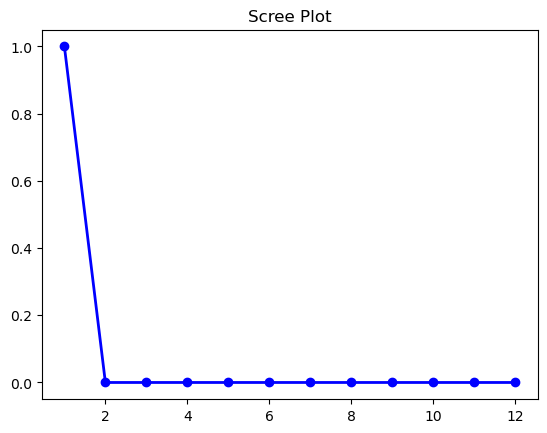

In [22]:
plt.plot(range(1,13),exp_var, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')


In [23]:
loadings = pca.components_[0:3]

In [24]:
loadings

array([[-2.08154034e-06, -2.95092863e-09, -8.50825173e-09,
         9.99997851e-01,  2.07314492e-03,  1.22356005e-07,
        -5.54499235e-09, -9.38846385e-10,  2.67745690e-08,
         3.84346696e-10,  6.57810112e-08,  7.20798795e-08,
         1.07841152e-08],
       [ 1.84061605e-03, -2.43499580e-06,  2.32310222e-05,
        -2.07313708e-03,  9.99995955e-01, -6.33437339e-04,
        -3.27914288e-06, -1.81696869e-05, -8.31297427e-06,
        -8.12418214e-06,  6.17856324e-06, -1.07431405e-05,
        -2.98300826e-05],
       [ 9.59734152e-01, -8.08906073e-04,  3.57165797e-03,
         6.06433495e-06, -1.94331436e-03, -2.78174374e-01,
        -3.06765044e-03, -6.92122504e-03, -4.80176478e-03,
        -6.17948345e-03, -2.26376626e-02, -2.93910435e-02,
        -4.16340252e-03]])

In [25]:
dict = {'PC1':loadings[0],'PC2':loadings[1],'PC3':loadings[2]}

In [26]:
pc_df=pd.DataFrame(dict)

In [27]:
pc_df

,PC1,PC2,PC3
0,-2.081540e-06,0.001841,0.959734
1,-2.950929e-09,-0.000002,-0.000809
2,-8.508252e-09,0.000023,0.003572
3,9.999979e-01,-0.002073,0.000006
4,2.073145e-03,0.999996,-0.001943
5,1.223560e-07,-0.000633,-0.278174
6,-5.544992e-09,-0.000003,-0.003068
7,-9.388464e-10,-0.000018,-0.006921
8,2.677457e-08,-0.000008,-0.004802
9,3.843467e-10,-0.000008,-0.006179


In [28]:
X_pca1=pca.transform(agg_pca)

In [29]:
X_pca1

array([[ 1.37035405e+08, -2.52319293e+04, -2.05421233e+02,
        -2.65026054e+02,  3.23614691e+00, -3.69189911e+00,
        -7.96647434e+00, -1.41810899e+00, -2.15981145e+00,
        -2.92336796e+00,  1.49325827e+00, -8.46478440e-01],
       [-1.39371782e+08, -3.12352607e+03,  7.93606645e+02,
        -5.14206933e+01, -2.74413347e+01, -1.38017535e+01,
         6.83388215e+00, -2.28537189e+00,  1.69647557e+00,
        -1.38089314e+00,  4.06793075e-01,  2.68251761e-01],
       [-1.13887582e+08,  1.85730389e+04, -6.28422215e+02,
         4.17111787e+02,  8.07647160e+01, -9.70167566e+00,
        -7.32778091e-01, -5.38070723e+00, -1.13030440e+00,
         1.32365754e+00,  1.84760473e-01, -1.28785054e+00],
       [ 3.90455280e+08, -8.06742587e+04,  7.13436513e+02,
         8.38927528e+01, -1.15867250e+01, -3.93397329e+00,
        -5.18333732e+00, -3.92273287e+00,  4.59371156e+00,
         5.42854678e+00, -1.27290143e+00, -2.43871123e-01],
       [-1.55190167e+08, -2.35588949e+03, -1.8316171

In [30]:
agg_pca.shape

(27, 13)

In [31]:
len(X_pca1)

27

In [32]:
pc_scores_dat = X_pca[0:3]

In [33]:
pc_scores_dat

array([[ 1.37035405e+08, -2.52319293e+04, -2.05421233e+02,
        -2.65026054e+02,  3.23614691e+00, -3.69189911e+00,
        -7.96647433e+00, -1.41810900e+00, -2.15981144e+00,
        -2.92336796e+00,  1.49325827e+00, -8.46478441e-01],
       [-1.39371782e+08, -3.12352607e+03,  7.93606645e+02,
        -5.14206933e+01, -2.74413347e+01, -1.38017535e+01,
         6.83388214e+00, -2.28537188e+00,  1.69647556e+00,
        -1.38089314e+00,  4.06793075e-01,  2.68251763e-01],
       [-1.13887582e+08,  1.85730389e+04, -6.28422215e+02,
         4.17111787e+02,  8.07647160e+01, -9.70167566e+00,
        -7.32778086e-01, -5.38070722e+00, -1.13030440e+00,
         1.32365754e+00,  1.84760475e-01, -1.28785054e+00]])

In [34]:
l=len(X_pca)
pc1=[]
pc2=[]
pc3=[]
for i in range(0,l):
    pc1.append(X_pca[i][0])
    pc2.append(X_pca[i][1])
    pc3.append(X_pca[i][2])

dict={'PC1':pc1,'PC2':pc2,'PC3':pc3}
pc_data=pd.DataFrame(dict)

In [35]:
pc_data

,PC1,PC2,PC3
0,1.370354e+08,-25231.929261,-205.421233
1,-1.393718e+08,-3123.526072,793.606645
2,-1.138876e+08,18573.038947,-628.422215
3,3.904553e+08,-80674.258723,713.436513
4,-1.551902e+08,-2355.889492,-1831.617106
5,-1.515693e+08,-2681.055193,1488.694908
6,-5.965463e+07,-11671.469253,-737.912352
7,4.682951e+06,-11923.579627,-1030.182097
8,-1.458088e+08,-3157.731623,-552.543458
9,-1.205774e+08,-2252.579956,-581.134848


## Visualization of the PCs:

<Axes: >

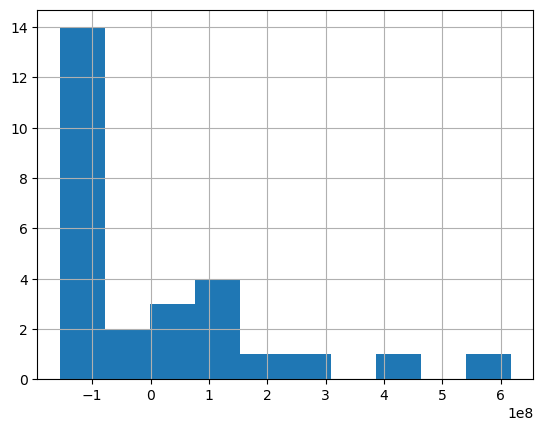

In [36]:
pc_data['PC1'].hist()

<Axes: >

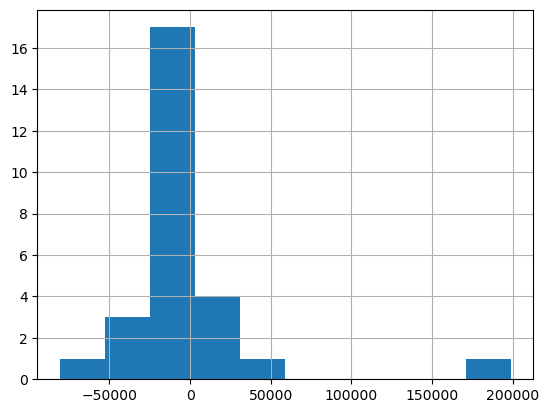

In [37]:
pc_data['PC2'].hist()

<Axes: >

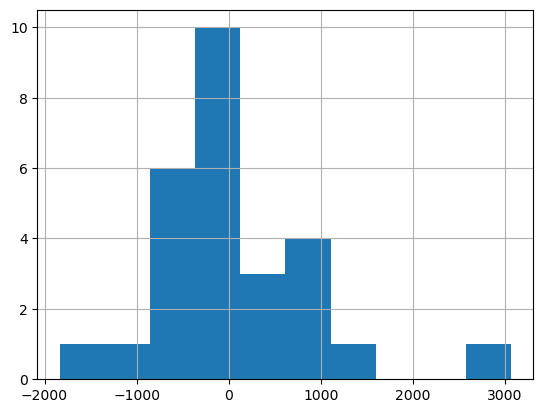

In [38]:
pc_data['PC3'].hist()

In [39]:
def out_trt(df,col):
    col_val=list(df[col])
    p1=np.percentile(col_val,2.5)
    p2=np.percentile(col_val,97.5)
    l=len(col_val)
    col_val1=[]
    for i in range(0,l):
        if col_val[i] <= p1:
            col_val1.append(p1)
        elif col_val[i] >= p2:
            col_val1.append(p2)
        else:
            col_val1.append(col_val[i])
    return col_val1

In [40]:
pc11=out_trt(pc_data,'PC1')
pc21=out_trt(pc_data,'PC2')
pc31=out_trt(pc_data,'PC3')

In [41]:
dict1={'PC1':pc11,'PC2':pc21,'PC3':pc31}
pc_data1=pd.DataFrame(dict1)

In [42]:
pc_data1

,PC1,PC2,PC3
0,1.370354e+08,-25231.929261,-205.421233
1,-1.393718e+08,-3123.526072,793.606645
2,-1.138876e+08,18573.038947,-628.422215
3,3.904553e+08,-52274.069496,713.436513
4,-1.549980e+08,-2355.889492,-1310.684350
5,-1.515693e+08,-2681.055193,1488.694908
6,-5.965463e+07,-11671.469253,-737.912352
7,4.682951e+06,-11923.579627,-1030.182097
8,-1.458088e+08,-3157.731623,-552.543458
9,-1.205774e+08,-2252.579956,-581.134848


<Axes: >

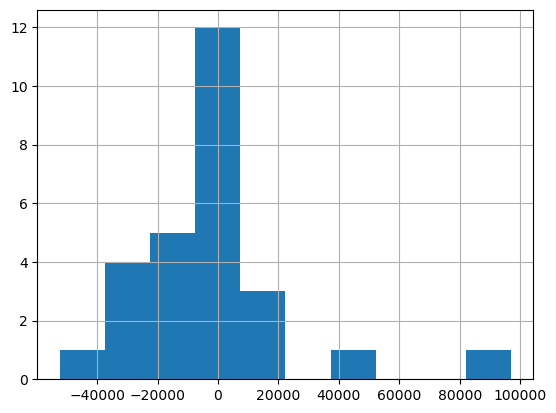

In [43]:
pc_data1['PC2'].hist()

In [44]:
!pip install scikit-learn

## Forming Clusters/Groups Using K-means Clustering:

In [45]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pc_data1)
    wcss.append(kmeans.inertia_)

In [46]:
wcss

[8.318084513486726e+17,
 2.1808849275839565e+17,
 7.26174644450294e+16,
 3.616665656521651e+16,
 1.6109747944212972e+16,
 1.2943419908596756e+16,
 1.0884989330572496e+16,
 7577722586881223.0,
 5519292008856962.0,
 3336399242013396.0,
 1164118957903358.2,
 629224174981121.5,
 294308126439476.6,
 237644360643843.78,
 187213220105212.6]

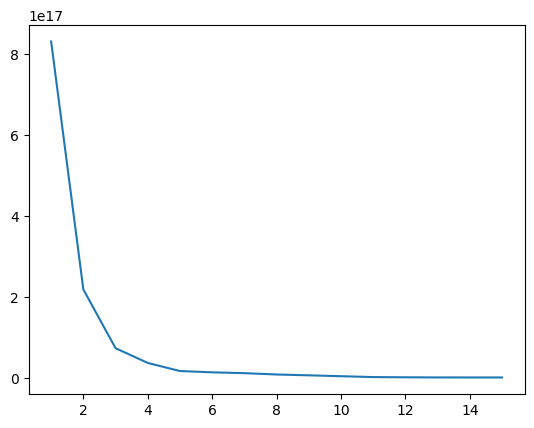

In [47]:
plt.plot(range(1,16),wcss)

In [48]:
x=pc_data1.iloc[:,:].values
kmeans=KMeans(n_clusters=4)
kmeans.fit_predict(x)

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 1, 3, 0, 3, 0, 1, 1, 1, 1, 2, 1, 3, 1,
       3, 0, 1, 2, 1])

In [49]:
clust=kmeans.fit_predict(x)
len(clust)

27

In [50]:
agg['clusters']=clust
agg.head()

,State,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3,clusters
0,Andhra Pradesh,914.030435,15.924091,80.186381,2.931179e+08,5.847015e+05,417.716522,0.157624,4.641369,61.698028,3.437154,49.447329,57.161582,2.822278,3
1,Arunachal Pradesh,2548.752174,28.093770,94.592133,1.671129e+07,3.377569e+04,298.405705,0.049388,2.470292,28.844897,0.406254,8.707814,10.183174,1.756376,1
2,Bihar,1302.650000,25.644085,85.906508,4.219539e+07,1.083074e+05,1115.887260,1.213082,19.086455,79.709216,14.555726,148.400321,170.348135,15.250610,1
3,Chhattisgarh,1264.300000,21.663736,81.840635,5.465374e+08,1.054634e+06,561.230424,0.729723,12.259750,57.800581,14.241895,64.288561,74.562686,10.417797,2
4,Delhi,632.754339,28.627393,77.171695,8.929410e+05,1.754794e+03,2953.710666,34.807960,67.725034,53.464935,67.901605,223.187554,279.782129,25.998844,1


In [51]:
agg1=agg.drop(['State'],axis=1)

In [52]:
agg1

,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3,clusters
0,914.030435,15.924091,80.186381,2.931179e+08,5.847015e+05,417.716522,0.157624,4.641369,61.698028,3.437154,49.447329,57.161582,2.822278,3
1,2548.752174,28.093770,94.592133,1.671129e+07,3.377569e+04,298.405705,0.049388,2.470292,28.844897,0.406254,8.707814,10.183174,1.756376,1
2,1302.650000,25.644085,85.906508,4.219539e+07,1.083074e+05,1115.887260,1.213082,19.086455,79.709216,14.555726,148.400321,170.348135,15.250610,1
3,1264.300000,21.663736,81.840635,5.465374e+08,1.054634e+06,561.230424,0.729723,12.259750,57.800581,14.241895,64.288561,74.562686,10.417797,2
4,632.754339,28.627393,77.171695,8.929410e+05,1.754794e+03,2953.710666,34.807960,67.725034,53.464935,67.901605,223.187554,279.782129,25.998844,1
5,3340.395455,15.300454,74.085513,4.513755e+06,8.929516e+03,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519,1
6,778.145455,22.385005,71.745261,9.642829e+07,1.904959e+05,331.262396,0.150302,4.389602,69.206029,5.030666,31.715338,47.771868,2.402378,0
7,471.540909,29.000000,76.000000,1.607657e+08,3.236255e+05,785.850448,0.836745,15.096582,72.187393,5.661694,83.182216,105.508482,16.968505,0
8,1140.100000,31.816760,77.349321,1.027431e+07,2.039923e+04,229.802326,0.028317,0.800847,75.992880,0.471607,6.843151,10.099281,7.942304,1
9,1169.700000,33.664930,75.162958,3.550565e+07,7.361280e+04,606.389054,0.838568,16.003795,62.143157,2.316830,37.433109,46.301135,13.926056,1


In [53]:
agg_clust=agg1.groupby(['clusters']).mean().reset_index()

In [54]:
agg_clust

,clusters,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
0,0,920.076494,20.532364,75.651387,1.527274e+08,3.117412e+05,437.776491,0.273196,6.564747,64.887096,4.449744,43.219783,54.550312,7.082158
1,1,2026.614456,25.365528,85.428680,1.707978e+07,3.617654e+04,618.416408,3.092894,10.704071,51.770391,7.648467,49.346299,58.866807,7.680542
2,2,1165.985507,23.112398,82.463344,5.856598e+08,1.243495e+06,622.022304,0.437293,9.714630,62.062450,9.296769,79.527095,90.992281,10.109492
3,3,899.303289,21.006634,79.368640,2.909003e+08,6.003961e+05,590.996799,0.507116,9.075575,64.549936,5.989603,61.559995,72.999884,11.205577


In [56]:
agg['clusters'].value_counts()

clusters
1    14
3     5
0     5
2     3
Name: count, dtype: int64

In [57]:
 agg['segments']=np.where(agg1['clusters']==3,2,agg1['clusters'])

In [58]:
agg['segments']

0     2
1     1
2     1
3     2
4     1
5     1
6     0
7     0
8     1
9     1
10    2
11    0
12    2
13    0
14    1
15    1
16    1
17    1
18    2
19    1
20    2
21    1
22    2
23    0
24    1
25    2
26    1
Name: segments, dtype: int32

In [59]:
agg_clust

,clusters,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3
0,0,920.076494,20.532364,75.651387,1.527274e+08,3.117412e+05,437.776491,0.273196,6.564747,64.887096,4.449744,43.219783,54.550312,7.082158
1,1,2026.614456,25.365528,85.428680,1.707978e+07,3.617654e+04,618.416408,3.092894,10.704071,51.770391,7.648467,49.346299,58.866807,7.680542
2,2,1165.985507,23.112398,82.463344,5.856598e+08,1.243495e+06,622.022304,0.437293,9.714630,62.062450,9.296769,79.527095,90.992281,10.109492
3,3,899.303289,21.006634,79.368640,2.909003e+08,6.003961e+05,590.996799,0.507116,9.075575,64.549936,5.989603,61.559995,72.999884,11.205577


In [62]:
agg

,State,Annual_Rainfall,Latitude,Longitude,Fertilizer,Pesticide,CO,NO,NO2,O3,SO2,PM25,PM10,NH3,clusters,segments
0,Andhra Pradesh,914.030435,15.924091,80.186381,2.931179e+08,5.847015e+05,417.716522,0.157624,4.641369,61.698028,3.437154,49.447329,57.161582,2.822278,3,2
1,Arunachal Pradesh,2548.752174,28.093770,94.592133,1.671129e+07,3.377569e+04,298.405705,0.049388,2.470292,28.844897,0.406254,8.707814,10.183174,1.756376,1,1
2,Bihar,1302.650000,25.644085,85.906508,4.219539e+07,1.083074e+05,1115.887260,1.213082,19.086455,79.709216,14.555726,148.400321,170.348135,15.250610,1,1
3,Chhattisgarh,1264.300000,21.663736,81.840635,5.465374e+08,1.054634e+06,561.230424,0.729723,12.259750,57.800581,14.241895,64.288561,74.562686,10.417797,2,2
4,Delhi,632.754339,28.627393,77.171695,8.929410e+05,1.754794e+03,2953.710666,34.807960,67.725034,53.464935,67.901605,223.187554,279.782129,25.998844,1,1
5,Goa,3340.395455,15.300454,74.085513,4.513755e+06,8.929516e+03,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519,1,1
6,Gujarat,778.145455,22.385005,71.745261,9.642829e+07,1.904959e+05,331.262396,0.150302,4.389602,69.206029,5.030666,31.715338,47.771868,2.402378,0,0
7,Haryana,471.540909,29.000000,76.000000,1.607657e+08,3.236255e+05,785.850448,0.836745,15.096582,72.187393,5.661694,83.182216,105.508482,16.968505,0,0
8,Himachal Pradesh,1140.100000,31.816760,77.349321,1.027431e+07,2.039923e+04,229.802326,0.028317,0.800847,75.992880,0.471607,6.843151,10.099281,7.942304,1,1
9,Jammu and Kashmir,1169.700000,33.664930,75.162958,3.550565e+07,7.361280e+04,606.389054,0.838568,16.003795,62.143157,2.316830,37.433109,46.301135,13.926056,1,1


In [63]:
df_new=pd.merge(df1_kharif,agg[['State','segments']],how='left',on='State')

In [65]:
df_new[df_new['segments'] == 1]['State'].value_counts()

State
Goa                  23
Nagaland             23
Arunachal Pradesh    23
Sikkim               23
Himachal Pradesh     22
Tripura              22
Delhi                22
Mizoram              21
Uttarakhand          21
Manipur              21
Puducherry           20
Jammu and Kashmir    20
Meghalaya             7
Bihar                 4
Name: count, dtype: int64

In [66]:
df_seg_sum_kharif=df_new[['Crop_Year','Yield','segments']].groupby(['Crop_Year','segments']).sum().reset_index()

In [67]:
df_seg_sum_kharif

,Crop_Year,segments,Yield
0,1997,0,13.742364
1,1997,1,9.875794
2,1997,2,7.505210
3,1998,0,7.560033
4,1998,1,16.629768
...,...,...,...
65,2018,2,14.665564
66,2019,0,12.752588
67,2019,1,23.699417
68,2019,2,16.729830


In [68]:
df_seg_mean_kharif=df_new[['Crop_Year','Yield','segments']].groupby(['Crop_Year','segments']).mean().reset_index()

In [69]:
df_seg_mean_kharif

,Crop_Year,segments,Yield
0,1997,0,4.580788
1,1997,1,1.410828
2,1997,2,2.501737
3,1998,0,1.890008
4,1998,1,1.662977
...,...,...,...
65,2018,2,2.444261
66,2019,0,2.550518
67,2019,1,2.154492
68,2019,2,2.788305


In [70]:
df_seg_mean_kharif.to_csv('state_segmented_kharif_mean.csv')

In [71]:
df_new['segments'] = np.where(df_new['segments'] == 0,'Medium and Emerging States',np.where(df_new['segments'] == 1,'Low Growing States','Consistently High Producing States'))

In [72]:
df_new.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [73]:
df_new

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,...,Longitude,CO,NO,NO2,O3,SO2,PM25,PM10,NH3,segments
0,Rice,1997,Kharif,Karnataka,1031530.0,2340493,1266.700000,9.817071e+07,319774.30,2.233500,...,75.722352,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258,Medium and Emerging States
1,Rice,1997,Kharif,Meghalaya,105170.0,150101,3818.200000,1.000903e+07,32602.70,1.378571,...,91.299910,360.723783,0.101559,3.785320,57.365694,1.508877,31.942162,35.108104,1.491881,Low Growing States
2,Rice,1998,Kharif,Puducherry,4945.0,11518,1434.587500,4.885660e+05,1434.05,2.460000,...,79.806949,374.877323,0.366987,7.600534,59.931593,5.227645,29.551619,35.972366,3.103348,Low Growing States
3,Rice,1998,Kharif,Goa,41000.0,104249,2964.900000,4.050800e+06,11890.00,2.540000,...,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519,Low Growing States
4,Rice,1998,Kharif,Karnataka,1079193.0,2599170,1260.800000,1.066243e+08,312965.97,2.310741,...,75.722352,337.693601,0.182891,4.914653,55.254451,2.337770,25.286665,30.029442,3.503258,Medium and Emerging States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Rice,2010,Kharif,Goa,30632.0,72221,4193.300000,5.088282e+06,7351.68,2.350000,...,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519,Low Growing States
501,Rice,2011,Kharif,Goa,31247.0,78770,3340.395455,5.234497e+06,10311.51,2.495000,...,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519,Low Growing States
502,Rice,2012,Kharif,Goa,31255.0,81229,3048.900000,4.713254e+06,9689.05,2.590000,...,74.085513,431.058805,0.302076,6.382126,47.391065,3.780022,40.404075,49.476902,6.329519,Low Growing States
503,Rice,1998,Kharif,Nagaland,141000.0,205000,1498.000000,1.393080e+07,40890.00,1.441429,...,94.588491,328.611851,0.044295,2.185430,35.886474,0.809673,19.575835,22.555509,2.803836,Low Growing States


In [74]:
df_seg_mean_kharif['segments'] = np.where(df_seg_mean_kharif['segments'] == 1,'Low Growing States',np.where(df_seg_mean_kharif['segments'] == 0,'Medium and Emerging States','Consistently High Producing States'))

In [75]:
df_seg_mean_kharif.to_csv('segments_year_yeild_kharif.csv')

In [76]:
df_new['counts'] = 1

In [77]:
ct_kharif = df_new[['State','segments','counts']].groupby(['State','segments']).mean().reset_index()

In [78]:
ct_kharif.to_csv('states_profile_kharif.csv')

In [79]:
agg['segments'] = np.where(agg['segments'] == 1,'Low Growing States',np.where(agg['segments'] == 0,'Medium and Emerging states','Consistently High Producing states'))

In [80]:
agg.drop(['clusters'],axis = 1,inplace = True)

In [81]:
agg.to_csv('segments_data.csv')

## Decision Tree Classifier:

In [87]:
X = agg.drop(['State','segments'],axis = 1)
Y = agg['segments']
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.3, random_state = 100)

In [83]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [88]:
dtree_khrf = DecisionTreeClassifier()
dtree_khrf = dtree_khrf.fit(X, Y)

In [89]:
prdctd = dtree_khrf.predict(X_train)

In [90]:
y_train

13            Medium and Emerging states
20    Consistently High Producing states
4                     Low Growing States
26                    Low Growing States
0     Consistently High Producing states
1                     Low Growing States
17                    Low Growing States
14                    Low Growing States
18    Consistently High Producing states
19                    Low Growing States
2                     Low Growing States
10    Consistently High Producing states
16                    Low Growing States
15                    Low Growing States
7             Medium and Emerging states
3     Consistently High Producing states
24                    Low Growing States
8                     Low Growing States
Name: segments, dtype: object

In [91]:
data_train = X_train.copy()

In [92]:
data_train['segments'] = list(y_train)

In [93]:
data_train['segments_predicted'] = prdctd

In [94]:
pd.crosstab(data_train['segments'],data_train['segments_predicted'])  #Train Confusion Matrix

segments_predicted,Consistently High Producing states,Low Growing States,Medium and Emerging states
segments,,,
Consistently High Producing states,5,0,0
Low Growing States,0,11,0
Medium and Emerging states,0,0,2


In [95]:
prdctd_test = dtree_khrf.predict(X_test)

In [96]:
data_test = X_test.copy()
data_test['segments'] = list(y_test)
data_test['segments_predicted'] = prdctd_test
pd.crosstab(data_test['segments'],data_test['segments_predicted'])  #Test Confusion Matrix

segments_predicted,Consistently High Producing states,Low Growing States,Medium and Emerging states
segments,,,
Consistently High Producing states,3,0,0
Low Growing States,0,3,0
Medium and Emerging states,0,0,3


Hence the model 'dtree_khrf' is the model, for predicting the segments of a given state or region in the Kharif season.

In [97]:
import pickle

In [98]:
# saving the kharif d-tree model classification model as a pickle file
model_pkl_file = "kharif_states_segment_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(dtree_khrf, file)